In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

I'm looking at the analysis of the Pi cycle model, from https://www.lookintobitcoin.com/charts/pi-cycle-top-indicator/

In [2]:
btc = pd.read_csv('data/btcall.csv', index_col='Date', parse_dates=True).sort_values('Date').apply(lambda x: x.str.replace(',', ''))

In [3]:
halvingdates = [datetime.date(2020, 5, 11), datetime.date(2016, 7, 9), datetime.date(2012, 11, 28)]

I need the daily MA 111 and the daily MA 350 with their values multiplied by 2.


In [4]:
ma111 = btc.Price.astype('float').rolling(window=111).mean()

In [5]:
ma111

Date
2010-07-18             NaN
2010-07-19             NaN
2010-07-20             NaN
2010-07-21             NaN
2010-07-22             NaN
                  ...     
2022-06-23    35514.337838
2022-06-24    35350.654054
2022-06-25    35198.282883
2022-06-26    35045.298198
2022-06-27    34883.119820
Name: Price, Length: 4363, dtype: float64

In [6]:
ma350 = btc.Price.astype('float').rolling(window=350).mean()*2

In [7]:
ma350

Date
2010-07-18             NaN
2010-07-19             NaN
2010-07-20             NaN
2010-07-21             NaN
2010-07-22             NaN
                  ...     
2022-06-23    87195.018286
2022-06-24    87123.186857
2022-06-25    87054.497143
2022-06-26    86979.158857
2022-06-27    86908.473143
Name: Price, Length: 4363, dtype: float64

In [8]:
df = pd.concat([btc.Price.astype('float'), ma111, ma350], axis=1)
df.columns = ['Price', 'MA111', 'MA350']

In [9]:
df = df.dropna()

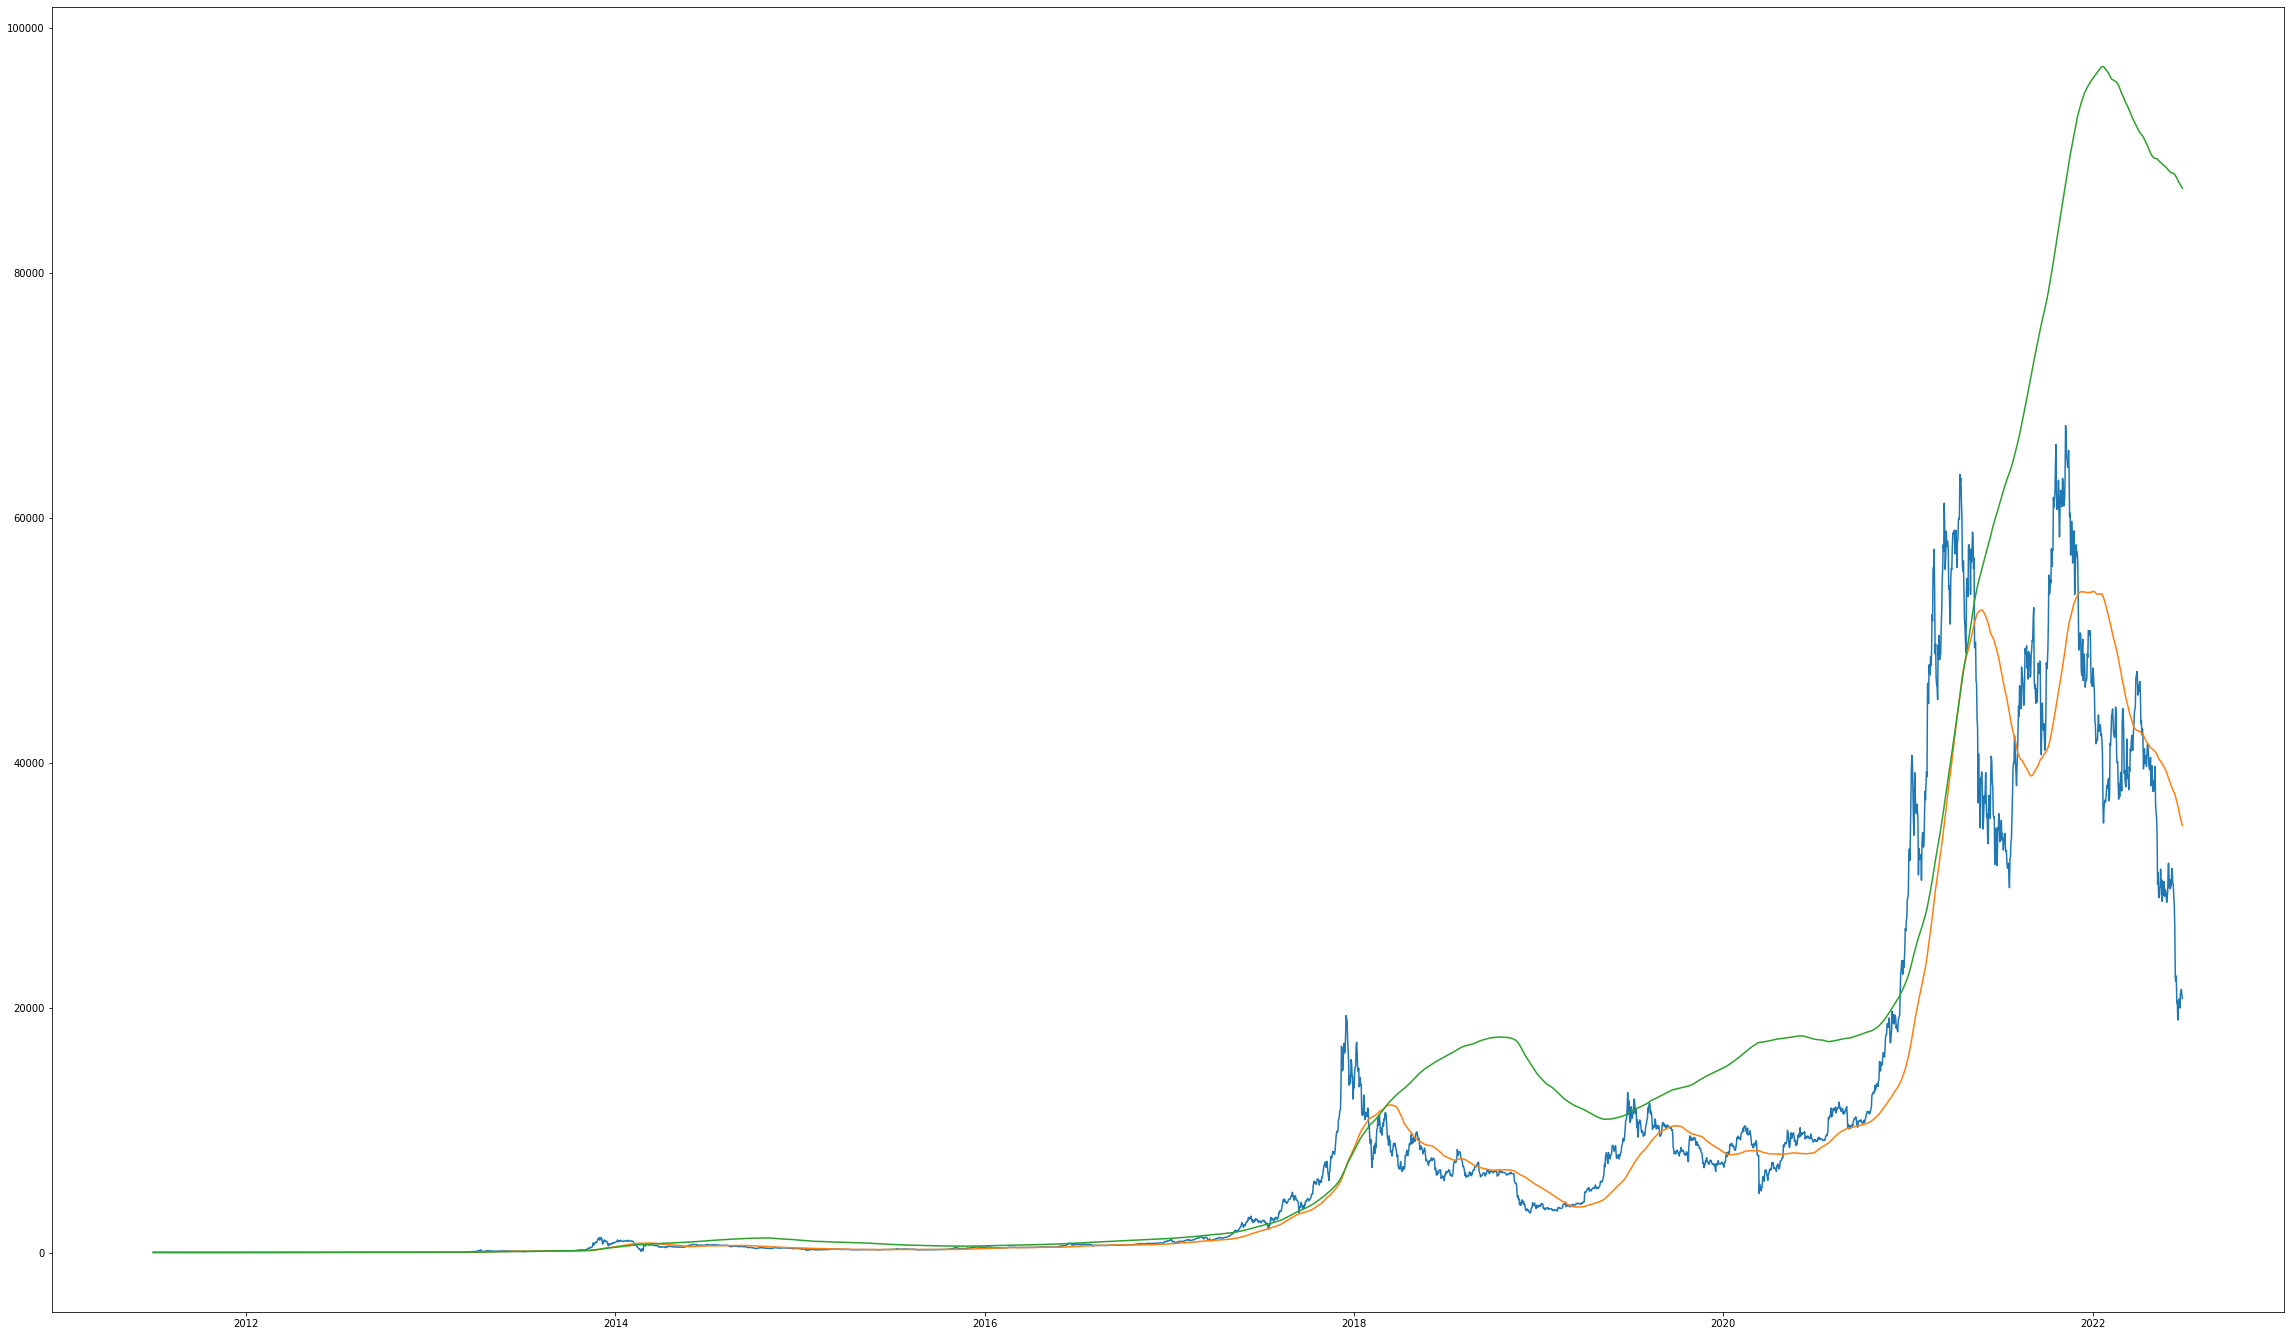

In [21]:
plt.figure(figsize=(40, 24))
plt.plot(df)
plt.show()

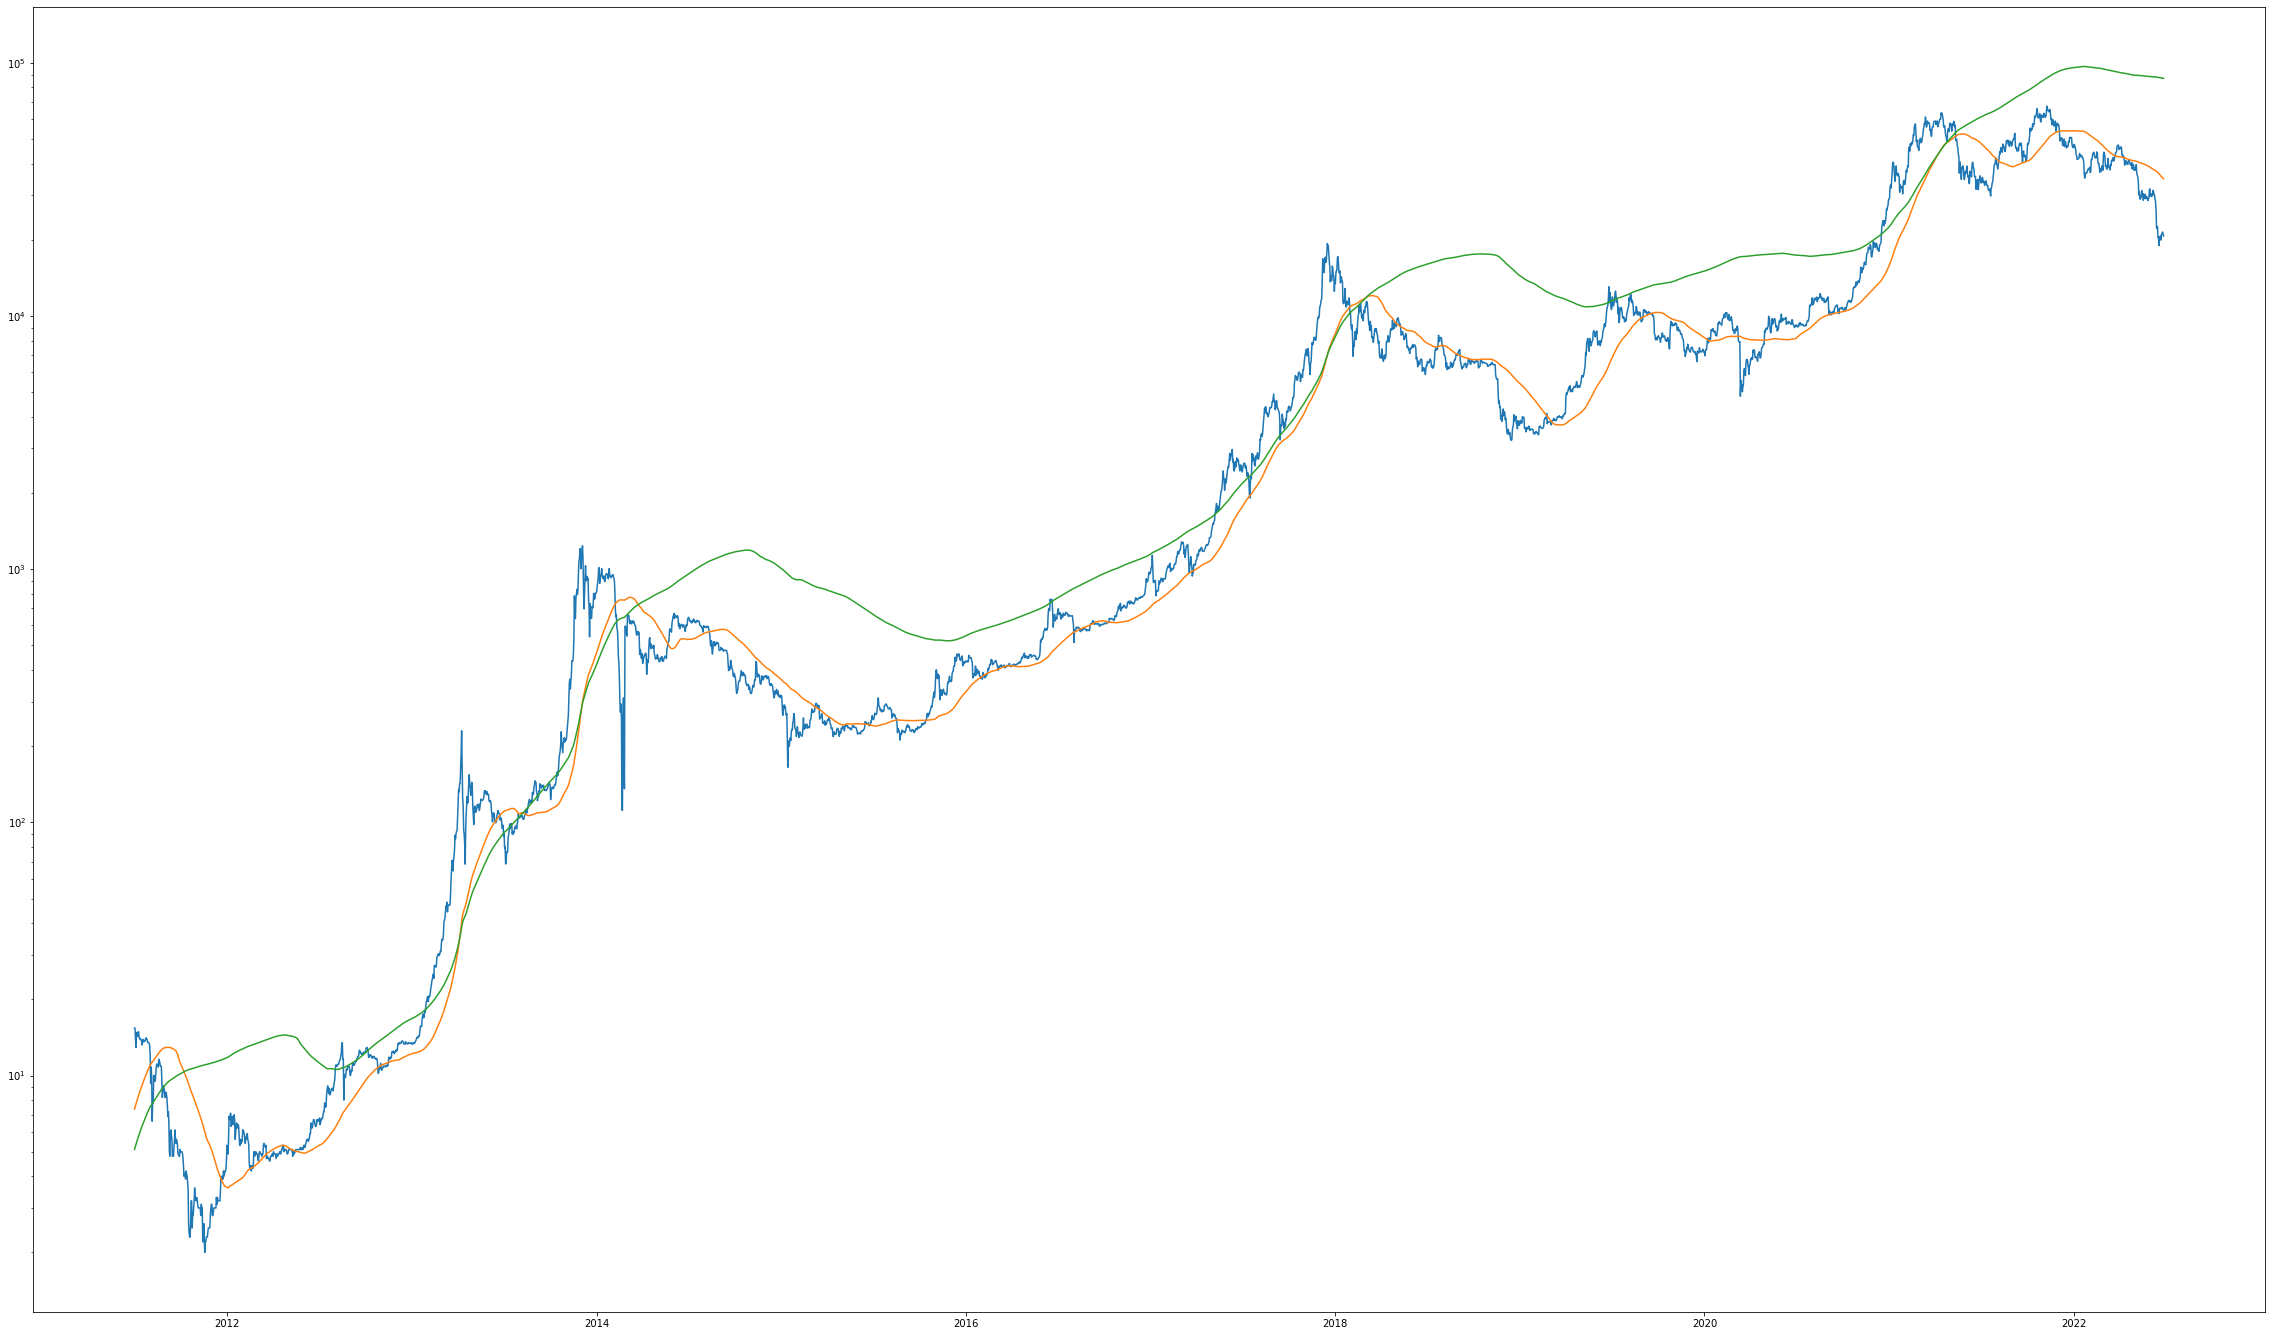

In [23]:
plt.figure(figsize=(40, 24))
plt.plot(df)
plt.yscale('log')
plt.show()